### Import libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

### Read data:

#### Rainfall data:

In [3]:
xls = pd.ExcelFile('2020_uryou_r2.xlsx')

# List all sheets in the file
print(xls.sheet_names)

['2020_寝屋川', '2020_枚方', '2020_茨木', '2020_西大阪']


##### Rainfall data of each area:

In [4]:
df_neyagawa = pd.read_excel('2020_uryou_r2.xlsx', sheet_name="2020_寝屋川")
df_neyagawa = df_neyagawa.iloc[6:, :]
display(df_neyagawa)

,地方局,寝屋川,寝屋川.1,寝屋川.2,寝屋川.3
6,2020年1月1日9時20分,0,0,0,0
7,2020年1月1日9時30分,0,0,0,0
8,2020年1月1日9時40分,0,0,0,0
9,2020年1月1日9時50分,0,0,0,0
10,2020年1月1日10時0分,0,0,0,0
...,...,...,...,...,...
52704,2021年1月1日8時20分,0,0,0,0
52705,2021年1月1日8時30分,0,0,0,0
52706,2021年1月1日8時40分,0,0,0,0
52707,2021年1月1日8時50分,0,0,0,0


In [5]:
df_hirakata = pd.read_excel('2020_uryou_r2.xlsx', sheet_name="2020_枚方")
df_hirakata = df_hirakata.iloc[6:, :]
display(df_hirakata)

,地方局,枚方,枚方.1,枚方.2,枚方.3
6,2020年1月1日9時20分,0,0,0,0
7,2020年1月1日9時30分,0,0,0,0
8,2020年1月1日9時40分,0,0,0,0
9,2020年1月1日9時50分,0,0,0,0
10,2020年1月1日10時0分,0,0,0,0
...,...,...,...,...,...
52704,2021年1月1日8時20分,0,0,0,0
52705,2021年1月1日8時30分,0,0,0,0
52706,2021年1月1日8時40分,0,0,0,0
52707,2021年1月1日8時50分,0,0,0,0


In [6]:
df_ibaraki = pd.read_excel('2020_uryou_r2.xlsx', sheet_name="2020_茨木")
df_ibaraki = df_ibaraki.iloc[6:, :]
display(df_ibaraki)

,地方局,茨木,茨木.1,茨木.2,茨木.3,茨木.4,茨木.5
6,2020年1月1日9時20分,0,0,0,0,0,0
7,2020年1月1日9時30分,0,0,0,0,0,0
8,2020年1月1日9時40分,0,0,0,0,0,0
9,2020年1月1日9時50分,0,0,0,0,0,0
10,2020年1月1日10時0分,0,0,0,0,0,0
...,...,...,...,...,...,...,...
52704,2021年1月1日8時20分,0,0,0,0,0,0
52705,2021年1月1日8時30分,0,0,0,0,0,0
52706,2021年1月1日8時40分,0,0,0,0,0,0
52707,2021年1月1日8時50分,0,0,0,0,0,0


In [7]:
df_nishiosaka = pd.read_excel('2020_uryou_r2.xlsx', sheet_name="2020_西大阪")
df_nishiosaka = df_nishiosaka.iloc[6:, :]
display(df_nishiosaka)

,地方局,西大阪,西大阪.1,西大阪.2,西大阪.3
6,2020年1月1日9時20分,0,0,0,0
7,2020年1月1日9時30分,0,0,0,0
8,2020年1月1日9時40分,0,0,0,0
9,2020年1月1日9時50分,0,0,0,0
10,2020年1月1日10時0分,0,0,0,0
...,...,...,...,...,...
52704,2021年1月1日8時20分,0,0,0,0
52705,2021年1月1日8時30分,0,0,0,0
52706,2021年1月1日8時40分,0,0,0,0
52707,2021年1月1日8時50分,0,0,0,0


##### Total rainfall of each area: 

In [8]:
df_neyagawa['寝屋川'] = df_neyagawa['寝屋川']+df_neyagawa['寝屋川.1']+df_neyagawa['寝屋川.2']+df_neyagawa['寝屋川.3']
df_neyagawa = df_neyagawa[['地方局', '寝屋川']]
df_hirakata['枚方'] = df_hirakata['枚方']+df_hirakata['枚方.1']+df_hirakata['枚方.2']+df_hirakata['枚方.3']
df_hirakata = df_hirakata[['地方局', '枚方']]
df_ibaraki['茨木'] = df_ibaraki['茨木']+df_ibaraki['茨木.1']+df_ibaraki['茨木.2']+df_ibaraki['茨木.3']+df_ibaraki['茨木.4']+df_ibaraki['茨木.5']
df_ibaraki = df_ibaraki[['地方局', '茨木']]
df_nishiosaka['西大阪'] = df_nishiosaka['西大阪']+df_nishiosaka['西大阪.1']+df_nishiosaka['西大阪.2']+df_nishiosaka['西大阪.3']
df_nishiosaka = df_nishiosaka[['地方局', '西大阪']]

##### Output rainfall data:

In [18]:
df_rainfall = df_neyagawa.merge(df_hirakata, on="地方局", how="outer")
df_rainfall = df_rainfall.merge(df_ibaraki, on="地方局", how="outer")
df_rainfall = df_rainfall.merge(df_nishiosaka, on="地方局", how="outer")
display(df_rainfall)

,地方局,寝屋川,枚方,茨木,西大阪
0,2020年1月1日9時20分,0,0,0,0
1,2020年1月1日9時30分,0,0,0,0
2,2020年1月1日9時40分,0,0,0,0
3,2020年1月1日9時50分,0,0,0,0
4,2020年1月1日10時0分,0,0,0,0
...,...,...,...,...,...
52698,2021年1月1日8時20分,0,0,0,0
52699,2021年1月1日8時30分,0,0,0,0
52700,2021年1月1日8時40分,0,0,0,0
52701,2021年1月1日8時50分,0,0,0,0


In [11]:
print(df_rainfall.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52703 entries, 0 to 52702
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   地方局     52703 non-null  object
 1   寝屋川     52660 non-null  object
 2   枚方      52697 non-null  object
 3   茨木      52588 non-null  object
 4   西大阪     52672 non-null  object
dtypes: object(5)
memory usage: 2.4+ MB
None


In [107]:
df_rainfall = df_rainfall.fillna(0)

In [108]:
print(df_rainfall[df_rainfall['地方局']=="2020年12月31日23時50分"].index)

Int64Index([52647], dtype='int64')


In [109]:
df_rainfall = df_rainfall.iloc[:52648, :]
display(df_rainfall.tail())

,地方局,寝屋川,枚方,茨木,西大阪
52643,2020年12月31日23時10分,0,0,0,0
52644,2020年12月31日23時20分,0,0,0,0
52645,2020年12月31日23時30分,0,0,0,0
52646,2020年12月31日23時40分,0,0,0,0
52647,2020年12月31日23時50分,0,0,0,0


In [110]:
df_rainfall.to_csv('rainfall.csv')

#### River level data:

In [21]:
df_river = pd.read_csv('Itoda_2020.txt', header=None, delimiter='\t')
df_river.columns = ['Time', 'Level']
display(df_river)

,Time,Level
0,2020年1月1日9時10分,0.40
1,2020年1月1日9時20分,0.40
2,2020年1月1日9時30分,0.41
3,2020年1月1日9時40分,0.40
4,2020年1月1日9時50分,0.41
...,...,...
48180,2020年11月30日23時10分,0.75
48181,2020年11月30日23時20分,0.78
48182,2020年11月30日23時30分,0.77
48183,2020年11月30日23時40分,0.79


In [117]:
print(df_river.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48185 entries, 0 to 48184
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    48185 non-null  object 
 1   Level   48185 non-null  float64
dtypes: float64(1), object(1)
memory usage: 753.0+ KB
None


##### Deal with null river level data:

In [23]:
null_indexes = df_river[df_river['Level'].isnull()].index.tolist()
for i in null_indexes:
    df_river.iloc[i, 1] = df_river.iloc[i-1, 1]  # Change null values to river level of 10 minutes ago
    
print(df_river.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48185 entries, 0 to 48184
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    48185 non-null  object 
 1   Level   48185 non-null  float64
dtypes: float64(1), object(1)
memory usage: 753.0+ KB
None


##### Plot water level data:

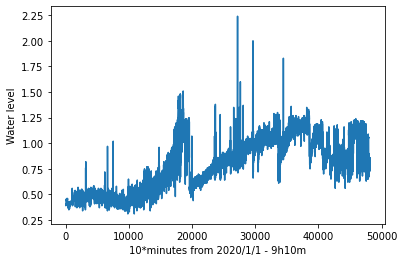

In [24]:
plt.plot(df_river.index, df_river['Level'])
plt.xlabel('10*minutes from 2020/1/1 - 9h10m')
plt.ylabel('River level')
plt.show()

### Analysis:

#### Using only water level data:

In [25]:
w = 6*24   # Prediction based on data of 1 previous day (6 samples per hour x 24 hours)
n_valid = 6*24      # Validation data: 2020年11月30日

In [26]:
x = []
y = []
levels = df_river['Level']

n_total = levels.shape[0]
for i in range(0, n_total-w-n_valid):
    x.append(levels[i:i+w])
    y.append(levels[i+w])
x = np.array(x)
y = np.array(y)
print(x[:3])  # debug
print(y[:3])  # debug

[[0.4  0.4  0.41 0.4  0.41 0.4  0.41 0.4  0.4  0.39 0.39 0.39 0.39 0.4
  0.4  0.4  0.41 0.41 0.41 0.41 0.4  0.41 0.41 0.41 0.41 0.41 0.41 0.41
  0.41 0.41 0.41 0.41 0.41 0.41 0.41 0.41 0.42 0.42 0.42 0.42 0.42 0.42
  0.42 0.41 0.42 0.42 0.42 0.43 0.43 0.42 0.43 0.43 0.43 0.45 0.44 0.45
  0.45 0.44 0.44 0.44 0.44 0.45 0.45 0.45 0.45 0.45 0.44 0.44 0.44 0.44
  0.44 0.45 0.45 0.45 0.44 0.45 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.45
  0.44 0.44 0.44 0.45 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.45
  0.44 0.45 0.44 0.44 0.44 0.44 0.44 0.45 0.44 0.45 0.45 0.45 0.45 0.45
  0.45 0.45 0.45 0.45 0.45 0.45 0.46 0.45 0.45 0.45 0.46 0.45 0.45 0.45
  0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45
  0.45 0.44 0.44 0.44]
 [0.4  0.41 0.4  0.41 0.4  0.41 0.4  0.4  0.39 0.39 0.39 0.39 0.4  0.4
  0.4  0.41 0.41 0.41 0.41 0.4  0.41 0.41 0.41 0.41 0.41 0.41 0.41 0.41
  0.41 0.41 0.41 0.41 0.41 0.41 0.41 0.42 0.42 0.42 0.42 0.42 0.42 0.42
  0.41 0.42 0.42 0.42 0.43 0.43 0.42 0.43 0

In [28]:
x = x.reshape(-1, w, 1)
y = y.reshape(-1, 1)
print(x.shape)
print(y.shape)

(47897, 144, 1)
(47897, 1)


In [29]:
n_out = 1
n_hidden = 100

# early stopping and model checkpoint
es_cb = EarlyStopping(monitor='val_loss',
                      patience=30, verbose=1, mode='auto')

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(w, 1), return_sequences=False))
model.add(Dense(n_out, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss="mean_squared_error", optimizer='adam')

In [31]:
n_epochs = 100
val_split = 0.2
batch_size = 400

fit_log = model.fit(x, y, batch_size=batch_size, epochs=n_epochs,
                    validation_split=val_split, callbacks=[es_cb])

Epoch 1/100
96/96 [==============================] - 86s 874ms/step - loss: 0.0241 - val_loss: 0.0044
Epoch 2/100
96/96 [==============================] - 72s 752ms/step - loss: 0.0023 - val_loss: 0.0043
Epoch 3/100
96/96 [==============================] - 70s 727ms/step - loss: 0.0022 - val_loss: 0.0043
Epoch 4/100
96/96 [==============================] - 70s 727ms/step - loss: 0.0022 - val_loss: 0.0042
Epoch 5/100
96/96 [==============================] - 70s 725ms/step - loss: 0.0022 - val_loss: 0.0040
Epoch 6/100
96/96 [==============================] - 72s 753ms/step - loss: 0.0022 - val_loss: 0.0039
Epoch 7/100
96/96 [==============================] - 74s 774ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 8/100
96/96 [==============================] - 75s 778ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 9/100
96/96 [==============================] - 72s 755ms/step - loss: 0.0020 - val_loss: 0.0036
Epoch 10/100
96/96 [==============================] - 71s 738ms/step - loss: 0.002

In [32]:
model.save('lstm_river_only_100epochs.h5')

##### Prediction:

In [33]:
# Against training data
pred = model.predict(x)
print(pred.shape)  # debug

train_real_output = levels[:n_total-n_valid-w]
print(np.shape(train_real_output))
print(mean_squared_error(pred, train_real_output))

(47897, 1)


In [41]:
print(mean_squared_error(pred, train_real_output))

0.013098564188466461


In [ ]:
# Future prediction
future_test = levels[n_total-w-n_valid:n_total-n_valid]
future_test = future_test.values.reshape(future_test.shape[0],1)
print(future_test.shape)
print(future_test[:5])  # debug
future_result = []

In [36]:
for i in range(n_valid):
    test_data = np.reshape(future_test, (1, w, 1))
    #print(test_data.shape)  # debug
    pred1 = model.predict(test_data)
    future_test = np.delete(future_test, 0)
    future_test = np.append(future_test, pred1)
    future_result = np.append(future_result, pred1)

In [37]:
valid_real_results = levels[n_total-n_valid:]
print(valid_real_results.shape)
print(future_result.shape)

(144,)
(144,)


##### Plot results:

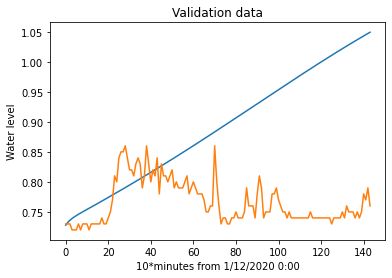

In [42]:
print(mean_squared_error(future_result, valid_real_results))
plt.plot(np.array(range(future_result.shape[0])), future_result, label="Prediction")
plt.plot(np.array(range(future_result.shape[0])), valid_real_results, label="Real")
plt.title("Validation data")
plt.xlabel("10*minutes from 1/12/2020 0:00")
plt.ylabel("Water level")
plt.show()

#### Using rainfall data + water level data:

##### Data preprocessing:

In [111]:
levels = df_river['Level']
rainfall = df_rainfall.loc[:, df_rainfall.columns!="地方局"]
n_total = levels.shape[0]
display(rainfall.head())

,寝屋川,枚方,茨木,西大阪
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [112]:
x2 = []
y2 = []

for i in range(0, n_total-w-n_valid):
    x_val = np.concatenate((np.array(rainfall.iloc[i+w-1, :]).reshape(rainfall.shape[1],1), np.array(levels[i:i+w]).reshape(w,1)), axis=0)
    x2.append(x_val)
    y2.append(levels[i+w])

x2 = np.asarray(x2).astype('float32')
y2 = np.array(y2).reshape(-1,1)
print(x2[:1])  # debug
print(y2[:5])  # debug

[[[0.  ]
  [0.  ]
  [0.  ]
  [0.  ]
  [0.4 ]
  [0.4 ]
  [0.41]
  [0.4 ]
  [0.41]
  [0.4 ]
  [0.41]
  [0.4 ]
  [0.4 ]
  [0.39]
  [0.39]
  [0.39]
  [0.39]
  [0.4 ]
  [0.4 ]
  [0.4 ]
  [0.41]
  [0.41]
  [0.41]
  [0.41]
  [0.4 ]
  [0.41]
  [0.41]
  [0.41]
  [0.41]
  [0.41]
  [0.41]
  [0.41]
  [0.41]
  [0.41]
  [0.41]
  [0.41]
  [0.41]
  [0.41]
  [0.41]
  [0.41]
  [0.42]
  [0.42]
  [0.42]
  [0.42]
  [0.42]
  [0.42]
  [0.42]
  [0.41]
  [0.42]
  [0.42]
  [0.42]
  [0.43]
  [0.43]
  [0.42]
  [0.43]
  [0.43]
  [0.43]
  [0.45]
  [0.44]
  [0.45]
  [0.45]
  [0.44]
  [0.44]
  [0.44]
  [0.44]
  [0.45]
  [0.45]
  [0.45]
  [0.45]
  [0.45]
  [0.44]
  [0.44]
  [0.44]
  [0.44]
  [0.44]
  [0.45]
  [0.45]
  [0.45]
  [0.44]
  [0.45]
  [0.44]
  [0.44]
  [0.44]
  [0.44]
  [0.44]
  [0.44]
  [0.44]
  [0.45]
  [0.44]
  [0.44]
  [0.44]
  [0.45]
  [0.44]
  [0.44]
  [0.44]
  [0.44]
  [0.44]
  [0.44]
  [0.44]
  [0.44]
  [0.44]
  [0.45]
  [0.44]
  [0.45]
  [0.44]
  [0.44]
  [0.44]
  [0.44]
  [0.44]
  [0.45]
  [0.44]
 

##### Executing model fitting:

In [123]:
n_out = 1
n_hidden = 100

# early stopping and model checkpoint
es_cb = EarlyStopping(monitor='val_loss',
                      patience=30, verbose=1, mode='auto')

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(w+4, 1), return_sequences=False))
model.add(Dense(n_out, activation='linear'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               40800     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [124]:
model.compile(loss="mean_squared_error", optimizer='adam')

In [125]:
n_epochs = 40
val_split = 0.2
batch_size = 400

fit_log = model.fit(x2, y2, batch_size=batch_size, epochs=n_epochs,
                    validation_split=val_split, callbacks=[es_cb])

Epoch 1/40
96/96 [==============================] - 84s 766ms/step - loss: 0.0283 - val_loss: 0.0043
Epoch 2/40
96/96 [==============================] - 72s 753ms/step - loss: 0.0023 - val_loss: 0.0043
Epoch 3/40
96/96 [==============================] - 71s 741ms/step - loss: 0.0023 - val_loss: 0.0042
Epoch 4/40
96/96 [==============================] - 69s 723ms/step - loss: 0.0022 - val_loss: 0.0041
Epoch 5/40
96/96 [==============================] - 69s 718ms/step - loss: 0.0022 - val_loss: 0.0040
Epoch 6/40
96/96 [==============================] - 68s 708ms/step - loss: 0.0022 - val_loss: 0.0039
Epoch 7/40
96/96 [==============================] - 72s 746ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 8/40
96/96 [==============================] - 71s 738ms/step - loss: 0.0021 - val_loss: 0.0037
Epoch 9/40
96/96 [==============================] - 71s 744ms/step - loss: 0.0020 - val_loss: 0.0036
Epoch 10/40
96/96 [==============================] - 71s 742ms/step - loss: 0.0020 - val_lo

In [128]:
model.save('lstm_river_rainfall_40epochs.h5')

In [126]:
# Against training data
pred = model.predict(x2)
print(pred.shape)  # debug

train_real_output = levels[:n_total-n_valid-w]
print(np.shape(train_real_output))
print(mean_squared_error(pred, train_real_output))

(47897, 1)
(47897,)
0.012979037028020855


##### Performance on validation data:

In [131]:
print(df_rainfall[df_rainfall['地方局']=="2020年11月30日0時0分"].index)

Int64Index([48040], dtype='int64')


In [156]:
valid_rainfall = rainfall.loc[48040:48040+6*24-1,:]
display(valid_rainfall)

,寝屋川,枚方,茨木,西大阪
48040,0,0,0,0
48041,0,0,0,0
48042,0,0,0,0
48043,0,0,0,0
48044,0,0,0,0
...,...,...,...,...
48179,0,0,0,0
48180,0,0,0,0
48181,0,0,0,0
48182,0,0,0,0


In [163]:
# Future prediction
level_test = np.array(levels[n_total-w-n_valid:n_total-n_valid])
future_test = np.concatenate((np.array(valid_rainfall.iloc[0, :]).reshape(valid_rainfall.shape[1],1), level_test.reshape(w,1)), axis=0)
future_test = future_test.reshape(future_test.shape[0],1)
print(future_test.shape)
print(future_test[:5])  # debug
future_result = []

(148, 1)
[[0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [1.05]]


In [164]:
for i in range(n_valid):
    test_data = np.reshape(future_test, (1, w+4, 1))
    #print(test_data.shape)  # debug
    pred1 = model.predict(test_data)
    level_test = np.delete(level_test, 0)
    level_test = np.append(level_test, pred1)
    future_test = np.concatenate((np.array(valid_rainfall.iloc[i, :]).reshape(valid_rainfall.shape[1],1), level_test.reshape(w,1)), axis=0)
    future_test = future_test.reshape(future_test.shape[0],1)
    future_result = np.append(future_result, pred1)

In [165]:
print(future_result)

[0.7255156  0.72772443 0.72938371 0.73061484 0.73158991 0.73239613
 0.73308927 0.73370785 0.73427916 0.73482138 0.73534679 0.73586333
 0.73637581 0.73688668 0.73739755 0.7379089  0.73842102 0.73893386
 0.73944712 0.73996091 0.740475   0.74098927 0.74150383 0.74201852
 0.7425335  0.74304867 0.74356425 0.74408031 0.74459672 0.74511367
 0.74563098 0.746149   0.7466675  0.74718666 0.74770659 0.74822694
 0.748748   0.74926972 0.7497921  0.75031525 0.75083894 0.75136328
 0.75188839 0.75241423 0.75294083 0.75346786 0.75399584 0.75452417
 0.75505322 0.75558299 0.75611359 0.7566449  0.75717676 0.75770932
 0.75824249 0.75877649 0.75931102 0.75984633 0.76038218 0.76091868
 0.76145589 0.76199365 0.76253247 0.76307195 0.76361173 0.76415235
 0.76469362 0.76523542 0.76577812 0.76632112 0.76686502 0.76740956
 0.76795471 0.76850063 0.7690472  0.76959431 0.77014208 0.77069056
 0.7712394  0.77178901 0.77233946 0.77289033 0.77344197 0.77399427
 0.7745471  0.77510059 0.77565461 0.77620947 0.77676487 0.7773

0.0022407968685380867


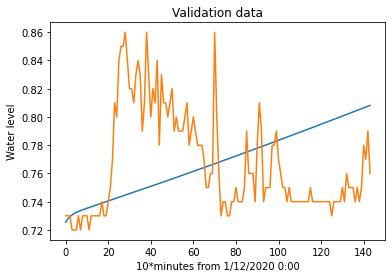

In [166]:
print(mean_squared_error(future_result, valid_real_results))
plt.plot(np.array(range(future_result.shape[0])), future_result, label="Prediction")
plt.plot(np.array(range(future_result.shape[0])), valid_real_results, label="Real")
plt.title("Validation data")
plt.xlabel("10*minutes from 1/12/2020 0:00")
plt.ylabel("Water level")
plt.show()

In [167]:
# Test data:

test = levels[n_total-w:]
test = test.values.reshape(test.shape[0],1)
print(test.shape)
print(test[:5])  # debug
future_result = []

(144, 1)
[[0.73]
 [0.73]
 [0.73]
 [0.72]
 [0.72]]


In [171]:
test_rainfall = df_rainfall.iloc[48184:, :]
display(test_rainfall)
test_rainfall = test_rainfall.loc[:, test_rainfall.columns!="地方局"]

,地方局,寝屋川,枚方,茨木,西大阪
48184,2020年12月1日0時0分,0,0,0,0
48185,2020年12月1日0時10分,0,0,0,0
48186,2020年12月1日0時20分,0,0,0,0
48187,2020年12月1日0時30分,0,0,0,0
48188,2020年12月1日0時40分,0,0,0,0
...,...,...,...,...,...
52643,2020年12月31日23時10分,0,0,0,0
52644,2020年12月31日23時20分,0,0,0,0
52645,2020年12月31日23時30分,0,0,0,0
52646,2020年12月31日23時40分,0,0,0,0


In [172]:
# Future prediction
level_test = np.array(levels[n_total-w:])
future_test = np.concatenate((np.array(test_rainfall.iloc[0, :]).reshape(test_rainfall.shape[1],1), level_test.reshape(w,1)), axis=0)
future_test = future_test.reshape(future_test.shape[0],1)
print(future_test.shape)
print(future_test[:5])  # debug
future_result = []

(148, 1)
[[0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.73]]


In [173]:
for i in range(4464):
    test_data = np.reshape(future_test, (1, w+4, 1))
    #print(test_data.shape)  # debug
    pred1 = model.predict(test_data)
    level_test = np.delete(level_test, 0)
    level_test = np.append(level_test, pred1)
    future_test = np.concatenate((np.array(test_rainfall.iloc[i, :]).reshape(valid_rainfall.shape[1],1), level_test.reshape(w,1)), axis=0)
    future_test = future_test.reshape(future_test.shape[0],1)
    future_result = np.append(future_result, pred1)

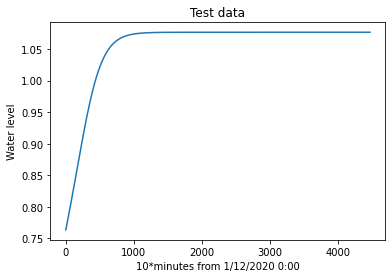

In [174]:
plt.plot(np.array(range(future_result.shape[0])), future_result, label="Prediction")
plt.title("Test data")
plt.xlabel("10*minutes from 1/12/2020 0:00")
plt.ylabel("Water level")
plt.show()

In [175]:
test_predictions = pd.DataFrame(range(len(future_result)), columns=['ID'])
test_predictions['Level'] = future_result
print(test_predictions)

        ID     Level
0        0  0.763600
1        1  0.763529
2        2  0.763846
3        3  0.764219
4        4  0.764677
...    ...       ...
4459  4459  1.076526
4460  4460  1.076526
4461  4461  1.076526
4462  4462  1.076526
4463  4463  1.076526

[4464 rows x 2 columns]


In [176]:
test_predictions.to_csv('lstm_river_rainfall_40epochs.csv', index=False)

#### Attention-based LSTM:

##### Import libraries:

In [180]:
from keras.layers import Layer
import keras.backend as K
from keras.layers import Input
from keras.models import Model

##### Build attention-based LSTM:

In [178]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [183]:
inputs=Input((w,1,))
att_in=LSTM(100, return_sequences=True, dropout=0.3, recurrent_dropout=0.2)(inputs)
att_out=attention()(att_in)
outputs=Dense(1,activation='sigmoid',trainable=True)(att_out)
model=Model(inputs,outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 144, 1)]          0         
                                                                 
 lstm_5 (LSTM)               (None, 144, 100)          40800     
                                                                 
 attention (attention)       (None, 100)               244       
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 41,145
Trainable params: 41,145
Non-trainable params: 0
_________________________________________________________________


In [185]:
model.compile(loss='mse', optimizer='adam')
model.fit(x, y, batch_size=batch_size, epochs=n_epochs, verbose=1, shuffle=True, validation_split=0.2)

Epoch 1/40
96/96 [==============================] - 124s 1s/step - loss: 0.0285 - val_loss: 0.0209
Epoch 2/40
96/96 [==============================] - 109s 1s/step - loss: 0.0105 - val_loss: 0.0168
Epoch 3/40
96/96 [==============================] - 110s 1s/step - loss: 0.0100 - val_loss: 0.0165
Epoch 4/40
96/96 [==============================] - 110s 1s/step - loss: 0.0099 - val_loss: 0.0165
Epoch 5/40
96/96 [==============================] - 115s 1s/step - loss: 0.0098 - val_loss: 0.0161
Epoch 6/40
96/96 [==============================] - 114s 1s/step - loss: 0.0096 - val_loss: 0.0161
Epoch 7/40
96/96 [==============================] - 115s 1s/step - loss: 0.0094 - val_loss: 0.0155
Epoch 8/40
96/96 [==============================] - 113s 1s/step - loss: 0.0093 - val_loss: 0.0157
Epoch 9/40
96/96 [==============================] - 118s 1s/step - loss: 0.0093 - val_loss: 0.0156
Epoch 10/40
96/96 [==============================] - 116s 1s/step - loss: 0.0094 - val_loss: 0.0158
Epoch 11/

In [191]:
model.save('lstm_attention_river_only_40epochs.h5')

##### Prediction and evaluation:

In [186]:
# Future prediction
future_test = levels[n_total-w:]
future_test = future_test.values.reshape(future_test.shape[0],1)
print(future_test.shape)
print(future_test[:5])  # debug
future_result = []

(144, 1)
[[0.73]
 [0.73]
 [0.73]
 [0.72]
 [0.72]]


In [187]:
for i in range(4464):
    test_data = np.reshape(future_test, (1, w, 1))
    #print(test_data.shape)  # debug
    pred1 = model.predict(test_data)
    future_test = np.delete(future_test, 0)
    future_test = np.append(future_test, pred1)
    future_result = np.append(future_result, pred1)

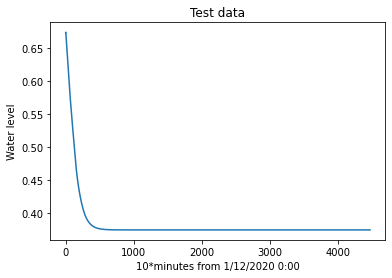

In [188]:
plt.plot(np.array(range(future_result.shape[0])), future_result, label="Prediction")
plt.title("Test data")
plt.xlabel("10*minutes from 1/12/2020 0:00")
plt.ylabel("Water level")
plt.show()

In [189]:
test_predictions = pd.DataFrame(range(len(future_result)), columns=['ID'])
test_predictions['Level'] = future_result
print(test_predictions)

        ID     Level
0        0  0.674103
1        1  0.674568
2        2  0.673953
3        3  0.672586
4        4  0.671021
...    ...       ...
4459  4459  0.374703
4460  4460  0.374703
4461  4461  0.374703
4462  4462  0.374703
4463  4463  0.374703

[4464 rows x 2 columns]


In [190]:
test_predictions.to_csv('lstm_attention_river_only_40epochs.csv', index=False)